# 1. 분석 환경 설정 및 데이터 로딩

In [1]:
# 모델 구현 시간 체크
import time
# 시작시간 체크
start = time.time()

In [2]:
# 패키지 로딩
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글폰트 적용
plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
# 수입 데이터 로딩 (가상데이터)
df_org = pd.read_csv('train.csv')
#쓸모없는 열 삭제
del df_org['Unnamed: 0']

In [4]:
# 데이터 사이즈 확인
df_org.shape

(76837, 24)

# 2. 데이터 전처리 

## 2.1 전처리 기본(수치형 변수 및 범주형 변수 지정등)

In [5]:
# 불필요한 변수 삭제
del df_org['검사결과코드']
del df_org['핵심적발']
del df_org['신고번호']
del df_org['신고일자']


del df_org['반입보세구역부호']
del df_org['HS10단위부호']
del df_org['수입자부호']
del df_org['해외거래처부호']

In [6]:
df_org.columns

Index(['통관지세관부호', '신고인부호', '수입자부호', '해외거래처부호', '특송업체부호', '수입통관계획코드',
       '수입신고구분코드', '수입거래구분코드', '수입종류코드', '징수형태코드', '신고중량(KG)', '과세가격원화금액',
       '운송수단유형코드', '반입보세구역부호', 'HS10단위부호', '적출국가코드', '원산지국가코드', '관세율구분코드',
       '관세율', '우범여부'],
      dtype='object')

In [7]:
df_org.shape

(76837, 20)

In [8]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76837 entries, 0 to 76836
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   통관지세관부호   76837 non-null  int64  
 1   신고인부호     76837 non-null  object 
 2   수입자부호     76829 non-null  object 
 3   해외거래처부호   50544 non-null  object 
 4   특송업체부호    25106 non-null  object 
 5   수입통관계획코드  76837 non-null  object 
 6   수입신고구분코드  76837 non-null  object 
 7   수입거래구분코드  76837 non-null  int64  
 8   수입종류코드    76837 non-null  int64  
 9   징수형태코드    76837 non-null  int64  
 10  신고중량(KG)  76837 non-null  float64
 11  과세가격원화금액  76837 non-null  float64
 12  운송수단유형코드  76837 non-null  int64  
 13  반입보세구역부호  76837 non-null  int64  
 14  HS10단위부호  76837 non-null  int64  
 15  적출국가코드    76837 non-null  object 
 16  원산지국가코드   76837 non-null  object 
 17  관세율구분코드   76837 non-null  object 
 18  관세율       76837 non-null  float64
 19  우범여부      76837 non-null  int64  
dtypes: float64(3), int64(8), obj

In [9]:
# 범주형 변수 지정
discrete_columns = [  '통관지세관부호',
       '신고인부호', '특송업체부호', '수입통관계획코드', 
       '수입신고구분코드', '수입거래구분코드',
       '수입종류코드', '징수형태코드', 
       '운송수단유형코드', 
        '적출국가코드', '원산지국가코드', '관세율구분코드'
                   ,'반입보세구역부호', 'HS10단위부호','수입자부호', '해외거래처부호']

# 범주형 변수들을 문자열로 지정 ('object' -> 'string')
for var in discrete_columns:
    df_org[var] = df_org[var].astype(str)

In [10]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76837 entries, 0 to 76836
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   통관지세관부호   76837 non-null  object 
 1   신고인부호     76837 non-null  object 
 2   수입자부호     76837 non-null  object 
 3   해외거래처부호   76837 non-null  object 
 4   특송업체부호    76837 non-null  object 
 5   수입통관계획코드  76837 non-null  object 
 6   수입신고구분코드  76837 non-null  object 
 7   수입거래구분코드  76837 non-null  object 
 8   수입종류코드    76837 non-null  object 
 9   징수형태코드    76837 non-null  object 
 10  신고중량(KG)  76837 non-null  float64
 11  과세가격원화금액  76837 non-null  float64
 12  운송수단유형코드  76837 non-null  object 
 13  반입보세구역부호  76837 non-null  object 
 14  HS10단위부호  76837 non-null  object 
 15  적출국가코드    76837 non-null  object 
 16  원산지국가코드   76837 non-null  object 
 17  관세율구분코드   76837 non-null  object 
 18  관세율       76837 non-null  float64
 19  우범여부      76837 non-null  int64  
dtypes: float64(3), int64(1), obj

In [11]:
# 수치형 변수 지정
numeric_columns = ['신고중량(KG)', '과세가격원화금액', '관세율', '우범여부']

# 수치형 변수를 자연로그로 변환
for var in ['신고중량(KG)', '과세가격원화금액']:
    df_org[var] = df_org[var].apply(lambda x: np.log1p(x))

In [12]:
df_org.head(5)

,통관지세관부호,신고인부호,수입자부호,해외거래처부호,특송업체부호,수입통관계획코드,수입신고구분코드,수입거래구분코드,수입종류코드,징수형태코드,신고중량(KG),과세가격원화금액,운송수단유형코드,반입보세구역부호,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,관세율,우범여부
0,121,2O5A2,82ZHWNL,nan,TQ18AK,D,B,15,23,43,4.844187,8.593963,10,2106003,8481900000,US,US,A,8.0,1
1,30,305K5,5IS70LE,nan,nan,C,B,11,21,11,10.303820,13.258812,40,4077010,2106909099,US,US,A,8.0,0
2,20,CGMT6,GJ5KBL3,R9ZQOG7,nan,D,B,11,21,18,10.067242,10.862759,40,4077007,6307909000,US,US,A,10.0,0
3,40,QWUTG,PBYW02T,nan,nan,C,B,94,21,43,9.429564,14.388527,40,4077106,6505009090,CN,CN,A,8.0,0
4,30,0X1CO,MCX0GJB,4Z9PX0Y,nan,C,B,11,21,43,9.661015,15.987683,40,2006075,6204320000,CN,CN,FCN1,5.2,1


## 2.2 훈련데이터와 테스트데이터 분리 및 범주형 변수 전처리

In [13]:
# 날짜 순에 따라 90:10 으로 훈련 및 테스트 데이터 분리
df_org_train = df_org.iloc[:int(len(df_org)*0.9), :]
df_org_test = df_org.iloc[int(len(df_org)*0.9):, :]

In [14]:
# 데이터 사이즈 확인
print(df_org_train.shape, df_org_test.shape)

(69153, 20) (7684, 20)


In [15]:
# 범주형 변수 전처리 1단계: label encoding --> 각 범주형 변수가 갖는 클래스에 고유의 식별번호 부여
# 예) 수입자 상호: AAABB -> 1, 가나다라 -> 2, ...

label_encoding_ref = {}
for var in discrete_columns:
    label_encoding_ref[var] = {code: i+1 for i, code in enumerate(df_org_train[var].unique())} # 0 padding for unseen data in test
    #print(label_encoding_ref[var])
    df_org_train[var] = [label_encoding_ref[var][x] for x in df_org_train[var]]
    df_org_test[var] = [label_encoding_ref[var].get(x,0) for x in df_org_test[var]]

df_org_train.reset_index(drop=True, inplace=True)
df_org_test.reset_index(drop=True, inplace=True)

<ipython-input-15-6ab5b30a190e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_org_train[var] = [label_encoding_ref[var][x] for x in df_org_train[var]]
<ipython-input-15-6ab5b30a190e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_org_test[var] = [label_encoding_ref[var].get(x,0) for x in df_org_test[var]]


In [16]:
# 트레인데이터 샘플 확인
df_org_train.sample(3)

,통관지세관부호,신고인부호,수입자부호,해외거래처부호,특송업체부호,수입통관계획코드,수입신고구분코드,수입거래구분코드,수입종류코드,징수형태코드,신고중량(KG),과세가격원화금액,운송수단유형코드,반입보세구역부호,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,관세율,우범여부
66641,2,700,2316,1617,31,1,1,22,2,2,4.948760,9.014287,2,9,455,2,2,1,8.0,0
54639,3,10,5967,30,3,1,1,1,2,2,8.507870,14.189865,1,14,613,2,2,1,8.0,1
12596,5,50,128,164,2,1,1,2,2,2,9.363799,15.460804,2,37,254,2,2,1,8.0,0


In [17]:
# 테스트데이터 샘플 확인
df_org_test.sample(3)

,통관지세관부호,신고인부호,수입자부호,해외거래처부호,특송업체부호,수입통관계획코드,수입신고구분코드,수입거래구분코드,수입종류코드,징수형태코드,신고중량(KG),과세가격원화금액,운송수단유형코드,반입보세구역부호,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,관세율,우범여부
2639,3,583,5856,886,9,1,2,14,6,6,7.467371,15.304076,1,14,846,2,2,2,2.0,1
521,4,52,4999,5,2,2,1,2,2,2,10.080051,15.615639,2,61,44,2,2,1,8.0,0
7351,3,67,5403,477,2,1,1,1,2,2,9.272075,10.007237,1,6,26,2,2,3,6.5,0


In [18]:
# one-hot-encoding
# 예) A,B,C 3개의 클래스가 있는 범주형 변수를 다음과 같이 변환
# A -> [1,0,0] / B -> [0,1,0] / C -> [0,0,1]

# 원핫인코더 로딩
from sklearn.preprocessing import  OneHotEncoder
# 원핫인코더 활성화
xgbohe = OneHotEncoder(categories="auto", handle_unknown='ignore')
# 훈련데이터: 범주형 변수만 분리하여 원핫인코딩 적용
df_org_train_cat = xgbohe.fit_transform(df_org_train[discrete_columns])
df_org_train_cat = pd.DataFrame(df_org_train_cat.toarray(), 
                                columns = xgbohe.get_feature_names(discrete_columns))
# 수치형 변수 분리
df_org_train_num = df_org_train[numeric_columns]

# 원핫인코딩된 범주형 변수와 수치형 변수 재결합
df_org_train = pd.concat([df_org_train_num, df_org_train_cat], axis=1)

In [22]:
# 훈련데이터 샘플 확인
df_org_train.shape

(69153, 17265)

In [23]:
# 테스트데이터: 범주형 변수만 분리하여 원핫인코딩 적용
df_org_test_cat = xgbohe.transform(df_org_test[discrete_columns])
df_org_test_cat = pd.DataFrame(df_org_test_cat.toarray(), 
                               columns = xgbohe.get_feature_names(discrete_columns))
# 수치형 변수 분리
df_org_test_num = df_org_test[numeric_columns]
# 원핫인코딩된 범주형 변수와 수치형 변수 재결합
df_org_test = pd.concat([df_org_test_num, df_org_test_cat], axis=1)

In [24]:
# 테스트데이터 샘플 확인
df_org_test.shape

(7684, 17265)

In [25]:
# 모델예측 대상인 우범여부 변수 분리
org_train_y = df_org_train.pop('우범여부')
org_test_y = df_org_test.pop('우범여부')

In [26]:
# 훈련데이터와 테스트데이터에서 우범건수 비교
from collections import Counter
cnt_train = Counter(org_train_y)
cnt_test = Counter(org_test_y)

print(f"훈련  데이터 비우범건수: {cnt_train[0]}, 훈련  데이터 우범건수: {cnt_train[1]}")
print(f"테스트데이터 비우범건수: {cnt_test[0]}, 테스트데이터 우범건수: {cnt_test[1]}")

훈련  데이터 비우범건수: 53371, 훈련  데이터 우범건수: 15782
테스트데이터 비우범건수: 5894, 테스트데이터 우범건수: 1790


## 3. 모델 생성 및 훈련

In [27]:
# XGBoost 모델 생성
from xgboost import XGBClassifier
from sklearn.metrics import f1_score,roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [28]:
# 모델 활성화 및 설정
xgb_clf = XGBClassifier(n_estimators=20, max_depth=4,n_jobs=-1) #
# 모델 훈련 시 성능평가 데이터 설정 (별도의 성능평가 데이터를 구성할 수도 있으나, 여기서는 그냥 테스트데이터를 사용)
eval_set = [(df_org_train, org_train_y), (df_org_test, org_test_y)]
# 모델 훈련 (training/fitting)
xgb_clf.fit(df_org_train, org_train_y, eval_metric=["logloss"], eval_set=eval_set, verbose=True)

MemoryError: Unable to allocate 8.89 GiB for an array with shape (17264, 69153) and data type float64

In [ ]:
from keras.utils.vis_utils import plot_model
# 의사결정 트리 중 첫번째 트리 시각화
import xgboost as xgb
xgb.to_graphviz(booster = xgb_clf, num_trees=0)

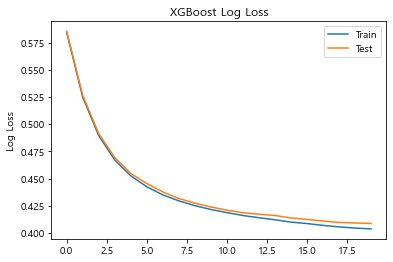

In [23]:
# 모델 성능 시각화

from matplotlib import pyplot
# retrieve performance metrics
results = xgb_clf.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
#pyplot.show()
plt.savefig('XGBoost Log Loss.png')

In [24]:
# evaluate xgboost model
print("------Evaluating xgboost model------")
# Predict
test_pred = xgb_clf.predict_proba(df_org_test)[:,1]
# Calculate auc
xgb_auc = roc_auc_score(org_test_y, test_pred)
print(xgb_auc)

------Evaluating xgboost model------
0.8330609861747483


In [25]:
# 검사율에 따른 우범예측 함수 생성

def inspection_performance(predicted_fraud, test_fraud):
    
    # Set default values before a loop
    
    Inspect_Rate = []
    Precision=[]
    Recall=[]
    
    # Create a loop for making confusion matrix at each inspection rate

    for i in range(0,101,1):
        
        # Find the ith value in ascending order.
        threshold = np.percentile(predicted_fraud, i)
        # Precision = number of frauds / number of inspection
        precision = np.mean(test_fraud[predicted_fraud >= threshold])
        # Recall = number of inspected frauds / number of frauds
        recall = sum(test_fraud[predicted_fraud >= threshold])/sum(test_fraud)
        # Save values
        Inspect_Rate.append(100-i)
        Precision.append(precision)
        Recall.append(recall)
        
    
    compiled_conf_matrix = pd.DataFrame({
        
        'Inspect_Rate':Inspect_Rate,
        'Precision':Precision,
        'Recall':Recall
    })

    return compiled_conf_matrix

In [26]:
# 검사율에 따른 우범예측 
basic_performance = inspection_performance(test_pred, org_test_y.astype(float))
# 검사율 1~10% 지정 시 Precision 및 Recall 분석
# Precision (적중률) = (검사선별된 우범건수)/(검사선별 건수)
# Recall (적발률) = (검사선별된 우범건수) / (전체 우범건수)
basic_performance.iloc[range(99,89,-1),:]

,Inspect_Rate,Precision,Recall
99,1,0.740260,0.031844
98,2,0.766234,0.065922
97,3,0.748918,0.096648
96,4,0.733766,0.126257
95,5,0.740260,0.159218
94,6,0.718004,0.184916
93,7,0.706320,0.212291
92,8,0.695935,0.239106
91,9,0.690751,0.267039
90,10,0.684005,0.293855


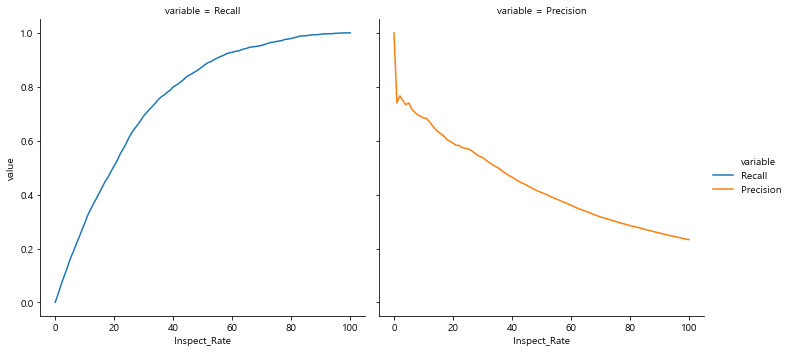

In [27]:
# 검사선별률에 따른 적중률 및 적발률 시각화
data = pd.melt(basic_performance, 
               id_vars = ['Inspect_Rate'],
               value_vars = ['Recall','Precision'])

sns.relplot(data=data,
            kind='line',
            x="Inspect_Rate", 
            y="value", 
            hue='variable',
            col="variable")
plt.savefig('recall & precision.png')


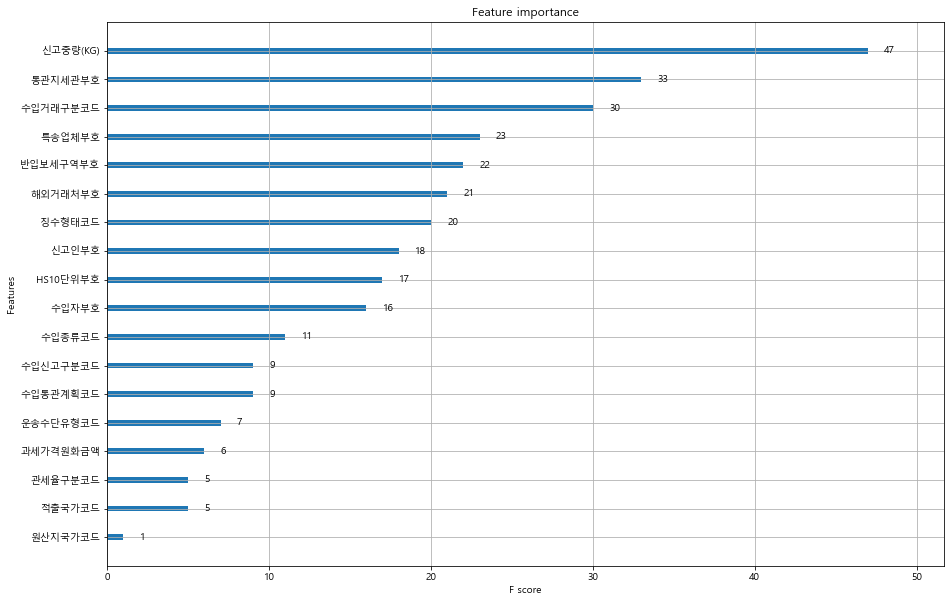

In [28]:
# 모델에 기여도가 높은 변수 시각화
from xgboost import plot_importance
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["figure.figsize"] = (15,10)
plot_importance(xgb_clf, max_num_features=30)
plt.show()

In [29]:
# 모델 종료 시간 확인
end = time.time()
# 모델 구동 시간 계산
print(f"모델구동시간 : {end-start} sec.")

모델구동시간 : 206.96554374694824 sec.


In [ ]:
eval_set = [(df_org_train, org_train_y), (df_org_test, org_test_y)]
# 모델 훈련 (training/fitting)
xgb_clf.fit(df_org_train, org_train_y, eval_metric=["logloss"], eval_set=eval_set, verbose=True)

In [31]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=6, random_state=123)

dt.fit(df_org_train,org_train_y)

y_preds = dt.predict(df_org_test)

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [34]:
print("accuracy score for trained data",accuracy_score(org_train_y,dt.predict(df_org_train)))
print("accuracy score is",accuracy_score(org_test_y,y_preds))

print("Confusion matrix",confusion_matrix(org_test_y,y_preds))

print("Report",classification_report(org_test_y,y_preds))

accuracy score for trained data 0.7976082021025841
accuracy score is 0.7928162415408642
Confusion matrix [[5567  327]
 [1265  525]]
Report               precision    recall  f1-score   support

           0       0.81      0.94      0.87      5894
           1       0.62      0.29      0.40      1790

    accuracy                           0.79      7684
   macro avg       0.72      0.62      0.64      7684
weighted avg       0.77      0.79      0.76      7684

